In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mfpml.problems.multifidelity_functions import *
from scipy.stats import spearmanr
from mfpml.design_of_experiment import MFSobolSequence

In [26]:
# calculate the correlation of each function
problem_sets = [
    "mf_Bohachevsky",
    "mf_Booth",
    "mf_Borehole",
    "mf_CurrinExp",
    "mf_Hartman3",
    "mf_Hartman6",
    "mf_Himmelblau",
    "mf_Park91A",
    "mf_Park91B",
    "mf_Sixhump",
]
# create an array to store the correlation
correlation_array = pd.DataFrame(
    np.zeros((len(problem_sets), 3)), columns=["function", "correlation", "dimension"]
)
for name in problem_sets:
    func = eval(name)()
    # get samplers
    sampler = MFSobolSequence(design_space=func.design_space, nested=True)
    # sample the function
    samples = sampler.get_samples(num_lf_samples=1000, num_hf_samples=1000)
    responses = func(samples)
    # calculate the correlation
    r2 = spearmanr(responses["hf"], responses["lf"])
    # save the correlation
    correlation_array.loc[problem_sets.index(name), "function"] = name
    correlation_array.loc[problem_sets.index(
        name), "correlation"] = r2.correlation
    correlation_array.loc[problem_sets.index(name), "dimension"] = func.num_dim

    print("=====================================")
    print("Function: ", name)
    print("Correlation: ", r2.correlation)
    print("Dimension: ", func.num_dim)
    print("=====================================")
# print(correlation_array)
correlation_array

Function:  mf_Bohachevsky
Correlation:  0.8942052302052304
Dimension:  2
Function:  mf_Booth
Correlation:  0.8220090780090781
Dimension:  2
Function:  mf_Borehole
Correlation:  0.9999999879999882
Dimension:  8
Function:  mf_CurrinExp
Correlation:  0.9972042492042492
Dimension:  2
Function:  mf_Hartman3
Correlation:  -0.2675776475776476
Dimension:  3
Function:  mf_Hartman6
Correlation:  0.7372856212856214
Dimension:  6
Function:  mf_Himmelblau
Correlation:  0.8230726390726392
Dimension:  2
Function:  mf_Park91A
Correlation:  0.9925255165255166
Dimension:  4
Function:  mf_Park91B
Correlation:  1.0
Dimension:  4
Function:  mf_Sixhump
Correlation:  0.630914994914995
Dimension:  2


,function,correlation,dimension
0,mf_Bohachevsky,0.894205,2.0
1,mf_Booth,0.822009,2.0
2,mf_Borehole,1.000000,8.0
3,mf_CurrinExp,0.997204,2.0
4,mf_Hartman3,-0.267578,3.0
5,mf_Hartman6,0.737286,6.0
6,mf_Himmelblau,0.823073,2.0
7,mf_Park91A,0.992526,4.0
8,mf_Park91B,1.000000,4.0
9,mf_Sixhump,0.630915,2.0


## read results from the file

In this notebook, we will do ablation study about MF-RBF-Kriging model.


In [2]:
# read results for mf-rbf-kriging
mf_rbf_kriging_input = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_input.csv", index_col=0
)
mf_rbf_kriging_output = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_output.csv", index_col=0
)
# merge input and output
mf_rbf_kriging_results = pd.merge(
    mf_rbf_kriging_input, mf_rbf_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_rbf_kriging_results["normalized_mae"] = mf_rbf_kriging_results[
    "normalized_mae"
].abs()
mf_rbf_kriging_results["normalized_rmse"] = mf_rbf_kriging_results[
    "normalized_rmse"
].abs()


# load kriging results
kriging_input = pd.read_csv("../kriging/exp_kriging_input.csv", index_col=0)
kriging_output = pd.read_csv("../kriging/exp_kriging_output.csv", index_col=0)
# merge input and output
kriging_results = pd.merge(
    kriging_input, kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
kriging_results["normalized_mae"] = kriging_results["normalized_mae"].abs()
kriging_results["normalized_rmse"] = kriging_results["normalized_rmse"].abs()
# remove results of "Forrestor_1a"
kriging_results = kriging_results[kriging_results["problem"] != "Forrester_1a"]

In [3]:
mf_rbf_kriging_results.problem.unique()

array(['mf_Bohachevsky', 'mf_Booth', 'mf_Borehole', 'mf_CurrinExp',
       'mf_Hartman3', 'mf_Hartman6', 'mf_Himmelblau', 'mf_Park91A',
       'mf_Park91B', 'mf_Sixhump'], dtype=object)

In [4]:
# create a new dataframe of  mf_rbf_kriging_results with num_lf from 25 to 100 with step 10
# and num_hf from 2 to 20 with step 4
mf_rbf_kriging_results_new = pd.DataFrame()
for num_lf in range(30, 101, 10):
    num_lf = int(num_lf)
    for num_hf in [2, 6, 10, 14, 18, 20]:
        num_hf = int(num_hf)
        mf_rbf_kriging_results_new = pd.concat(
            [
                mf_rbf_kriging_results_new,
                mf_rbf_kriging_results[
                    (mf_rbf_kriging_results["num_lf"] == num_lf)
                    & (mf_rbf_kriging_results["num_hf"] == num_hf)
                ],
            ]
        )

In [5]:
mf_rbf_kriging_results_new

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
10,mf_rbf,2,30,mf_Bohachevsky,1,finished,1.256389,0.413878,0.590745,0.894083
210,mf_rbf,2,30,mf_Bohachevsky,2,finished,1.922851,0.445087,0.546178,0.352340
410,mf_rbf,2,30,mf_Bohachevsky,3,finished,1.774485,0.565319,0.241433,0.275478
610,mf_rbf,2,30,mf_Bohachevsky,4,finished,1.603783,0.502696,0.426023,0.406644
810,mf_rbf,2,30,mf_Bohachevsky,5,finished,2.003571,0.462435,0.508890,0.333184
...,...,...,...,...,...,...,...,...,...,...
9159,mf_rbf,20,100,mf_Sixhump,1,finished,0.011485,0.002363,0.999997,1.943577
9359,mf_rbf,20,100,mf_Sixhump,2,finished,0.005964,0.001181,0.999999,2.262634
9559,mf_rbf,20,100,mf_Sixhump,3,finished,0.087505,0.009616,0.999950,1.901631
9759,mf_rbf,20,100,mf_Sixhump,4,finished,0.027748,0.002932,0.999996,1.380933


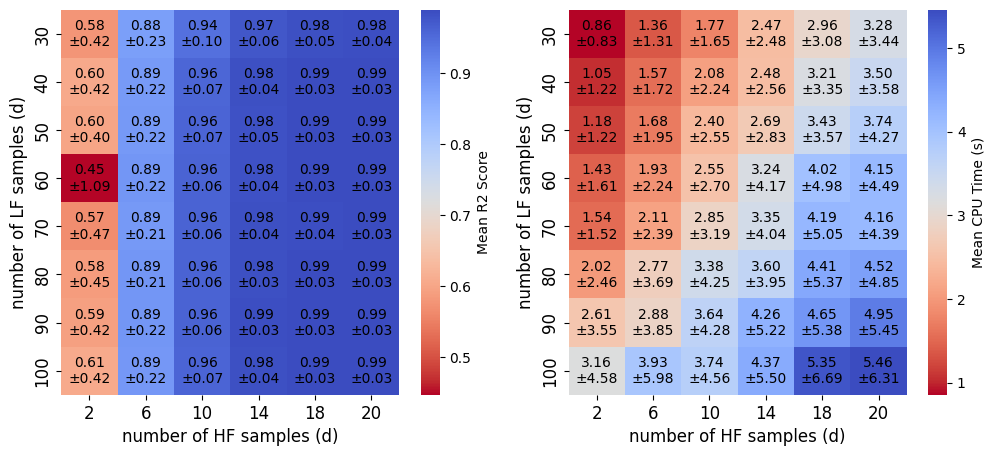

In [11]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = mf_rbf_kriging_results_new.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)


# Create a pivot table for num_lf, num_hf, mean, and std of cpu_time
pivot_table_cpu_time = mf_rbf_kriging_results_new.pivot_table(
    values="cpu_time", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values for cpu_time
annotations_mean_cpu_time = (
    pivot_table_cpu_time["mean"].applymap("{:.2f}".format).astype(str).values
)
annotations_std_cpu_time = (
    "±" +
    pivot_table_cpu_time["std"].applymap("{:.2f}".format).astype(str).values
)

# Combine annotations for cpu_time
annotations_combined_cpu_time = [
    f"{m}\n{s}"
    for m, s in zip(
        annotations_mean_cpu_time.flatten(), annotations_std_cpu_time.flatten()
    )
]
annotations_combined_cpu_time = np.array(annotations_combined_cpu_time).reshape(
    annotations_mean_cpu_time.shape
)

# Create a combined heatmap for cpu_time
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean R2 Score"},
    annot_kws={"color": "black"},
    ax=ax[0],
)
ax[0].set_xlabel("number of HF samples (d)", fontsize=12)
ax[0].set_ylabel("number of LF samples (d)", fontsize=12)
ax[0].set_xticklabels([2, 6, 10, 14, 18, 20], fontsize=12)
ax[0].set_yticklabels([30, 40, 50, 60, 70, 80, 90, 100], fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(
    pivot_table_cpu_time["mean"],
    annot=annotations_combined_cpu_time,
    fmt="",
    cmap="coolwarm_r",
    annot_kws={"color": "black"},
    cbar_kws={"label": "Mean CPU Time (s)"},
    ax=ax[1],
)
plt.xlabel("number of HF samples (d)", fontsize=12)
plt.ylabel("number of LF samples (d)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("mf_rbf_kriging_sample_influence.png",
            dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_sample_influence.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_sample_influence.svg",
            dpi=300, bbox_inches="tight")
plt.show()

In [16]:
# create a pandas data-frame with num_lf=100
mf_rbf_kriging_results_new_100 = mf_rbf_kriging_results[
    mf_rbf_kriging_results["num_lf"] == 100
]
mf_rbf_kriging_results_new_100

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
150,mf_rbf,2,100,mf_Bohachevsky,1,finished,1.208836,0.416693,0.585160,0.758001
151,mf_rbf,4,100,mf_Bohachevsky,1,finished,1.634194,0.474234,0.462678,0.676170
152,mf_rbf,6,100,mf_Bohachevsky,1,finished,0.850978,0.121082,0.964973,1.511898
153,mf_rbf,8,100,mf_Bohachevsky,1,finished,0.167960,0.051532,0.993655,0.840807
154,mf_rbf,10,100,mf_Bohachevsky,1,finished,0.051510,0.017514,0.999267,2.244325
...,...,...,...,...,...,...,...,...,...,...
9955,mf_rbf,12,100,mf_Sixhump,5,finished,0.201492,0.030960,0.999489,1.365308
9956,mf_rbf,14,100,mf_Sixhump,5,finished,0.766020,0.122268,0.992031,0.765131
9957,mf_rbf,16,100,mf_Sixhump,5,finished,0.034483,0.005644,0.999983,1.546154
9958,mf_rbf,18,100,mf_Sixhump,5,finished,0.026759,0.005224,0.999985,1.600158


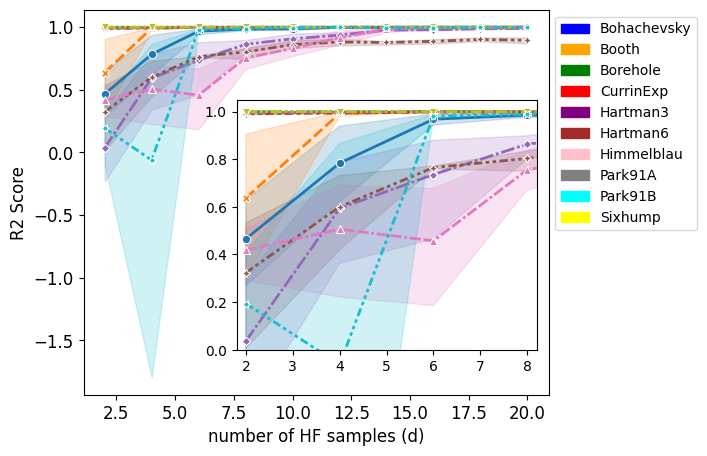

In [68]:
# plot the influence of num_hf on r2
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.lineplot(
    data=mf_rbf_kriging_results_new_100,
    x="num_hf",
    y="r2",
    hue="problem",
    style="problem",
    linewidth=2,
    markers=True,
    ax=ax,
)
plt.xlabel("number of HF samples (d)", fontsize=12)
plt.ylabel("R2 Score", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
legend_elements = [
    Patch(color="blue", label="Bohachevsky"),
    Patch(color="orange", label="Booth"),
    Patch(color="green", label="Borehole"),
    Patch(color="red", label="CurrinExp"),
    Patch(color="purple", label="Hartman3"),
    Patch(color="brown", label="Hartman6"),
    Patch(color="pink", label="Himmelblau"),
    Patch(color="gray", label="Park91A"),
    Patch(color="cyan", label="Park91B"),
    Patch(color="yellow", label="Sixhump"),
]
ax.legend(handles=legend_elements, loc="upper left", bbox_to_anchor=(1, 1))
# Add a subplot on top
# Adjust the [left, bottom, width, height] values as needed
ax_inset = plt.axes([0.38, 0.2, 0.5, 0.5])
sns.lineplot(
    data=mf_rbf_kriging_results_new_100,
    x="num_hf",
    y="r2",
    hue="problem",
    style="problem",
    linewidth=2,
    markers=True,
    ax=ax_inset,
)
ax_inset.set_xlim([1.8, 8.2])
ax_inset.set_ylim([0, 1.05])
ax_inset.legend().set_visible(False)
ax_inset.set_xlabel("")
ax_inset.set_ylabel("")


plt.show()

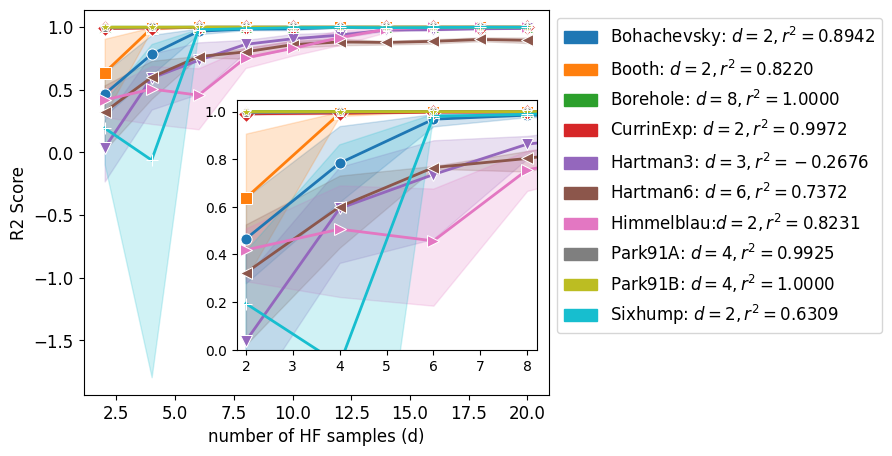

In [89]:
# Define colors corresponding to each problem
colors = {
    "mf_Bohachevsky": "#1f77b4",
    "mf_Booth": "#ff7f0e",
    "mf_Borehole": "#2ca02c",
    "mf_CurrinExp": "#d62728",
    "mf_Hartman3": "#9467bd",
    "mf_Hartman6": "#8c564b",
    "mf_Himmelblau": "#e377c2",
    "mf_Park91A": "#7f7f7f",
    "mf_Park91B": "#bcbd22",
    "mf_Sixhump": "#17becf",
}
markers = {
    "mf_Bohachevsky": "o",
    "mf_Booth": "s",
    "mf_Borehole": "^",
    "mf_CurrinExp": "D",
    "mf_Hartman3": "v",
    "mf_Hartman6": "<",
    "mf_Himmelblau": ">",
    "mf_Park91A": "p",
    "mf_Park91B": "*",
    "mf_Sixhump": "+",
}

# plot the influence of num_hf on r2
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for problem, color in colors.items():
    subset = mf_rbf_kriging_results_new_100[
        mf_rbf_kriging_results_new_100["problem"] == problem
    ]
    sns.lineplot(
        x=subset["num_hf"],
        y=subset["r2"],
        color=color,
        label=problem,
        linewidth=2,
        marker=markers[problem],
        markersize=8,  # Adjust the marker size as needed
        ax=ax,
    )
plt.xlabel("number of HF samples (d)", fontsize=12)
plt.ylabel("R2 Score", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a subplot on top
# Adjust the [left, bottom, width, height] values as needed
ax_inset = plt.axes([0.38, 0.2, 0.5, 0.5])
for problem, color in colors.items():
    subset = mf_rbf_kriging_results_new_100[
        mf_rbf_kriging_results_new_100["problem"] == problem
    ]
    sns.lineplot(
        x=subset["num_hf"],
        y=subset["r2"],
        color=color,
        label=problem,
        linewidth=2,
        marker=markers[problem],
        markersize=8,  # Adjust the marker size as needed
        ax=ax_inset,
    )
ax_inset.set_xlim([1.8, 8.2])
ax_inset.set_ylim([0, 1.05])
ax_inset.legend().set_visible(False)
ax_inset.set_xlabel("")
ax_inset.set_ylabel("")

# Set the custom legend
legend_elements = [
    Patch(color="#1f77b4", label=r"Bohachevsky: $d=2, r^2=0.8942$"),
    Patch(color="#ff7f0e", label=r"Booth: $d=2, r^2=0.8220$"),
    Patch(color="#2ca02c", label=r"Borehole: $d=8, r^2=1.0000$"),
    Patch(color="#d62728", label=r"CurrinExp: $d=2, r^2=0.9972$"),
    Patch(color="#9467bd", label=r"Hartman3: $d=3, r^2=-0.2676$"),
    Patch(color="#8c564b", label=r"Hartman6: $d=6, r^2=0.7372$"),
    Patch(color="#e377c2", label=r"Himmelblau:$ d=2, r^2=0.8231$"),
    Patch(color="#7f7f7f", label=r"Park91A: $d=4, r^2=0.9925$"),
    Patch(color="#bcbd22", label=r"Park91B: $d=4, r^2=1.0000$"),
    Patch(color="#17becf", label=r"Sixhump: $d=2, r^2=0.6309$"),
]
ax.legend(handles=legend_elements, loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)
plt.savefig("mf_rbf_kriging_correlation_influence.png", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_correlation_influence.pdf", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_correlation_influence.svg", dpi=300, bbox_inches="tight")

plt.show()

In [104]:
# select mf_Hartman3 function
mf_rbf_kriging_results_hartman3 = mf_rbf_kriging_results[
    mf_rbf_kriging_results["problem"] == "mf_Hartman6"
]
kriging_results_hartman3 = kriging_results[kriging_results["problem"]
                                           == "mf_Hartman6"]

kriging_results_hartman3[kriging_results_hartman3["num_sample"]
                         == 20]['r2'].mean()

0.8818276065071469

In [96]:
# find out the case with 100d lf samples and 10d hf samples
aa = mf_rbf_kriging_results_hartman3[
    (mf_rbf_kriging_results_hartman3["num_lf"] == 100)
    & (mf_rbf_kriging_results_hartman3["num_hf"] == 20)
]
aa["r2"].mean()

0.8955030789890508

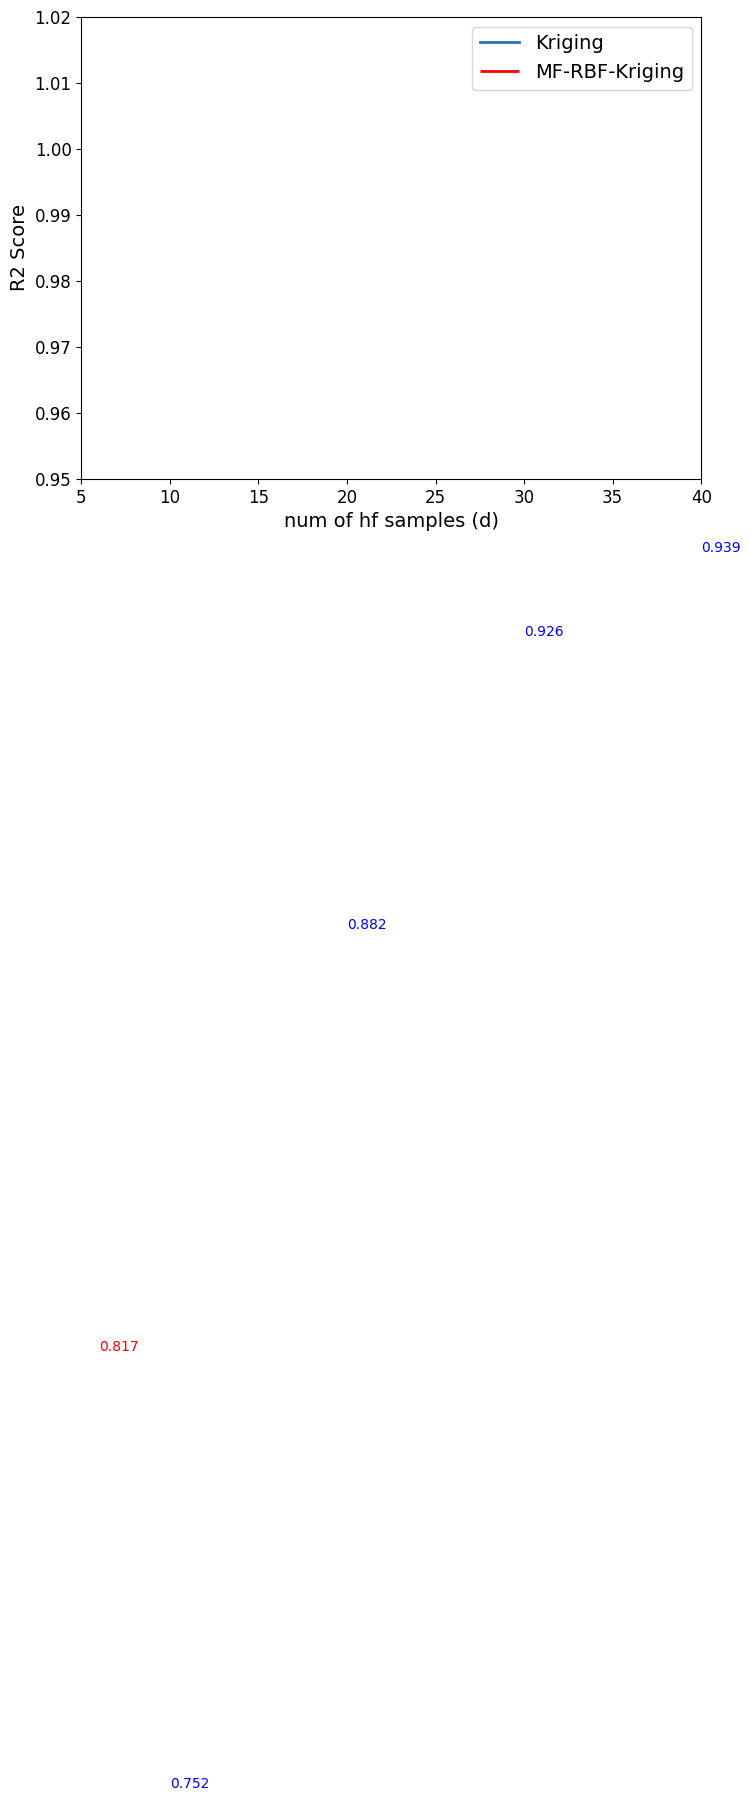

In [92]:
# plot accuracy of kriging with different number of samples
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(
    x="num_sample",
    y="r2",
    data=kriging_results_hartman3,
    label="Kriging",
    linewidth=2,
)

# plot results of mf-rbf-kriging
plt.hlines(
    y=aa["r2"].mean(),
    xmin=6,
    xmax=40,
    label="MF-RBF-Kriging",
    colors="red",
    linewidth=2,
)
plt.text(6, aa["r2"].mean() + 0.001, f"{aa['r2'].mean():.3f}", color="red")
# Calculate the average "r2" value for each num_sample
average_r2_per_sample = kriging_results_hartman3.groupby("num_sample")["r2"].mean()
# Annotate each point with the average "r2" value
for i, (num_sample, average_r2) in enumerate(average_r2_per_sample.items()):
    if (i + 1) % 5 == 0:  # Show every 2nd iteration
        plt.text(num_sample, average_r2, f"{average_r2:.3f}", color="blue")


plt.fill_between(
    x=[6, 40],
    y1=aa["r2"].mean() - 1.95 * aa["r2"].std(),
    y2=aa["r2"].mean() + 1.95 * aa["r2"].std(),
    color="red",
    alpha=0.2,
)
plt.xlabel("num of hf samples (d)", fontsize=14)
plt.ylabel("R2 Score", fontsize=14)
ax.set_xlim(5, 40)
ax.set_ylim(0.95, 1.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

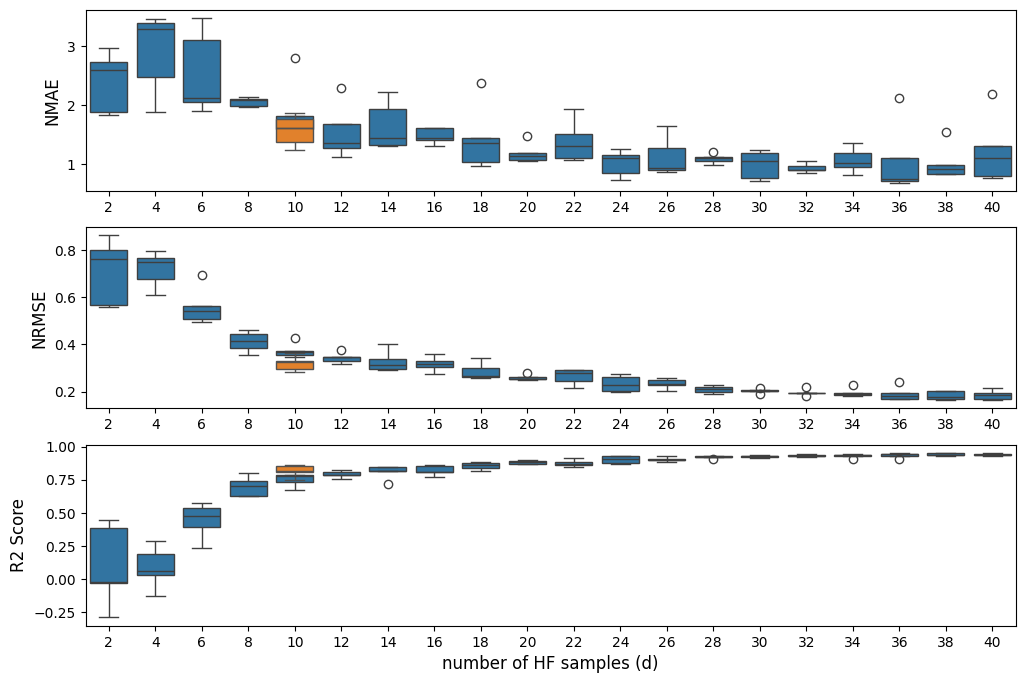

In [93]:
# same plots for normalized_mae and normalized_rmse and r2
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
sns.boxplot(
    x="num_sample",
    y="normalized_mae",
    data=kriging_results_hartman3,
    ax=ax[0],
)
# # plot results of mf-rbf-kriging
sns.boxplot(
    x="num_hf",
    y="normalized_mae",
    data=aa,
    ax=ax[0],
)
# plot settings
ax[0].set_ylabel("NMAE", fontsize=12)
ax[0].set_xlabel("")
# plot normalized_rmse
sns.boxplot(
    x="num_sample",
    y="normalized_rmse",
    data=kriging_results_hartman3,
    ax=ax[1],
)
# # plot results of mf-rbf-kriging
sns.boxplot(
    x="num_hf",
    y="normalized_rmse",
    data=aa,
    ax=ax[1],
)
# plot settings
ax[1].set_ylabel("NRMSE", fontsize=12)
ax[1].set_xlabel("")

# plot r2
sns.boxplot(
    x="num_sample",
    y="r2",
    data=kriging_results_hartman3,
    ax=ax[2],
)
# # plot results of mf-rbf-kriging
sns.boxplot(
    x="num_hf",
    y="r2",
    data=aa,
    ax=ax[2],
)
# plot settings
ax[2].set_ylabel("R2 Score", fontsize=12)
ax[2].set_xlabel("number of HF samples (d)", fontsize=12)


plt.savefig("mf_rbf_kriging_six_hump_accuracy.png", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_six_hump_accuracy.pdf", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_kriging_six_hump_accuracy.svg", dpi=300, bbox_inches="tight")
plt.show()